In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

#Importing the dataset

In [2]:

url = "https://drive.google.com/uc?export=download&id=1QCvpbf68dP6oVPGh1XnosFRaU4MmOes1"

# Load the dataset
df = pd.read_csv(url)

print(df.head())

   claim_amount  vintage Gender   Area  marital_status type_of_policy  \
0           555        5   Male  Urban               0         Silver   
1           625        5   Male  Urban               0         Silver   
2           821        5   Male  Urban               0         Silver   
3          1498        5   Male  Urban               0         Silver   
4           559        5   Male  Urban               0         Silver   

          income qualification policy num_policies   cltv  
0  More than 10L       Masters      a            1   5263  
1  More than 10L     Bachelors      a  More than 1   6064  
2  More than 10L     Bachelors      a  More than 1   8314  
3  More than 10L       Masters      c            1  13995  
4  More than 10L     Bachelors      a            1   4822  


In [11]:
df.shape

(1017209, 11)

In [4]:
df.describe()

,claim_amount,vintage,marital_status,cltv
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,6.331459e+02,3.002370e+00,3.052470e-02,5.773819e+03
std,4.644117e+02,1.997568e+00,1.720261e-01,3.849926e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.050000e+02,1.000000e+00,0.000000e+00,3.727000e+03
50%,6.090000e+02,3.000000e+00,0.000000e+00,5.744000e+03
75%,8.370000e+02,5.000000e+00,0.000000e+00,7.856000e+03
max,7.388000e+03,6.000000e+00,1.000000e+00,4.155100e+04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   claim_amount    1017209 non-null  int64 
 1   vintage         1017209 non-null  int64 
 2   Gender          1017209 non-null  object
 3   Area            1017209 non-null  object
 4   marital_status  1017209 non-null  int64 
 5   type_of_policy  1017209 non-null  object
 6   income          1017209 non-null  object
 7   qualification   1017209 non-null  object
 8   policy          1017209 non-null  object
 9   num_policies    1017209 non-null  object
 10  cltv            1017209 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 85.4+ MB


No missing values in our dataset

In [6]:
print("Data Missing in training dataset ",df.isna().sum().sum())

Data Missing in training dataset  0


# EDA

In [7]:
print(df.groupby('vintage')['cltv'].mean().reset_index())
print(" ")
print(df.groupby('num_policies')['cltv'].mean().reset_index())
print(" ")
print(df.groupby('policy')['cltv'].mean().reset_index())
print(" ")
print(df.groupby('type_of_policy')['cltv'].mean().reset_index())
print(" ")

   vintage         cltv
0        0   204.183189
1        1  7809.044510
2        2  7005.244467
3        3  6555.884138
4        4  6247.575913
5        5  6723.274305
6        6  5847.562599
 
  num_policies         cltv
0            1  6124.710161
1  More than 1  5423.718218
 
  policy         cltv
0      a  5481.026096
1      b  8553.931999
2      c  6058.676567
 
  type_of_policy         cltv
0           Gold  5620.979034
1         Silver  6476.522207
 


In [8]:
print(df.groupby('Gender')['cltv'].mean().reset_index())
print(" ")
print(df.groupby('Area')['cltv'].mean().reset_index())
print(" ")
print(df.groupby('qualification')['cltv'].mean().reset_index())
print(" ")
print(df.groupby('income')['cltv'].mean().reset_index())
print(" ")

   Gender         cltv
0  Female     0.000000
1    Male  6955.514291
 
    Area         cltv
0  Rural  4406.050805
1  Urban  7991.152046
 
  qualification          cltv
0     Bachelors   5738.179710
1   High School   5641.819243
2       Masters   5723.629246
3        Others  10058.837334
 
          income         cltv
0           0-5L  5658.533675
1          5-10L  5833.290704
2  More than 10L  5878.245380
 


In [9]:
df['marital_status']=df['marital_status'].astype('object')
df['vintage']=df['vintage'].astype('object')



#Identify categorical and numerical variables
categoricals = df.columns[df.dtypes == 'object']
numeric = df.columns[df.dtypes != 'object']

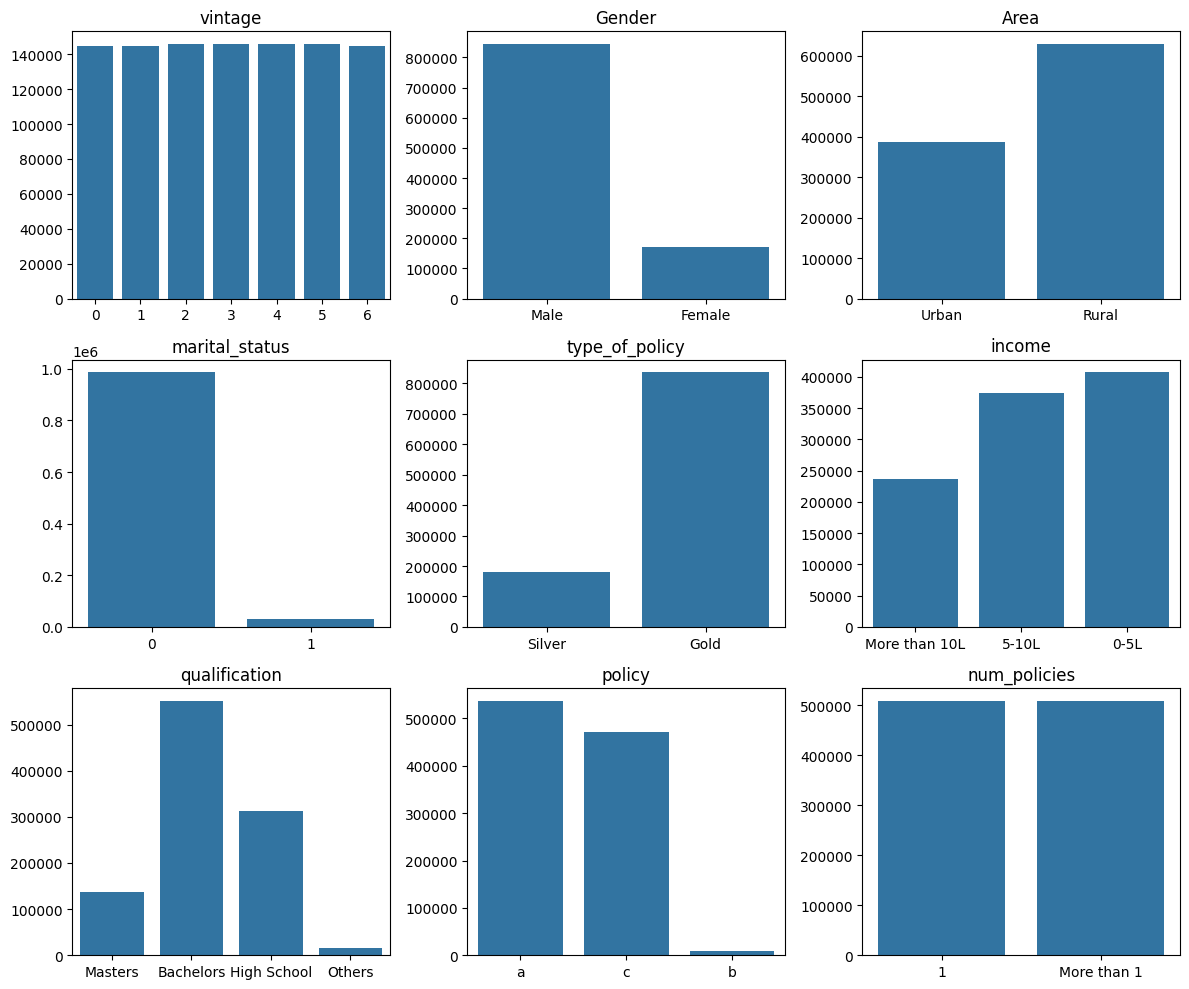

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(12, 10))

for i, subplot in enumerate(ax.flatten()):
    if i < len(categoricals):
        sns.countplot(x=df[categoricals[i]], ax=subplot)
        subplot.set(xlabel=None, ylabel=None, title=categoricals[i])
    else:
        subplot.axis('off')

plt.tight_layout()
plt.show()


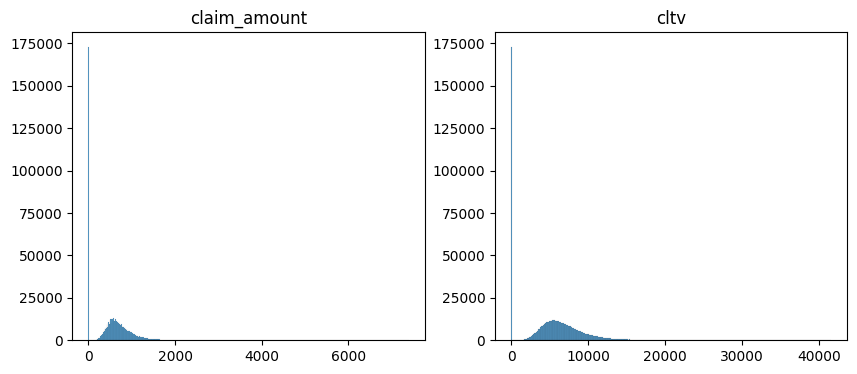

In [12]:
fig, ax = plt.subplots(1,len(numeric),figsize=(10,4))
for i, subplots in zip(numeric, ax.flatten()):
    sns.histplot(x=df[i],ax=subplots).set(xlabel=None, ylabel=None, title=i)
plt.show()

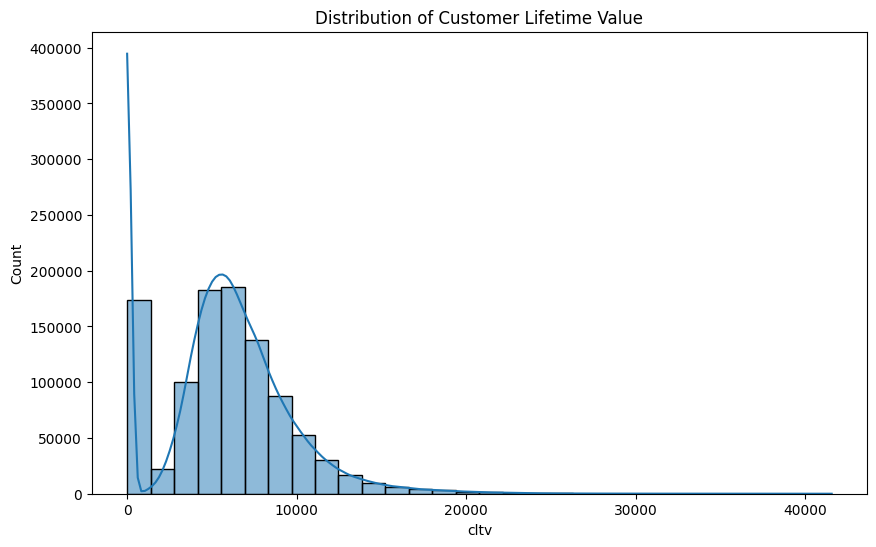

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cltv'], bins=30, kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.show()


<Axes: xlabel='claim_amount', ylabel='cltv'>

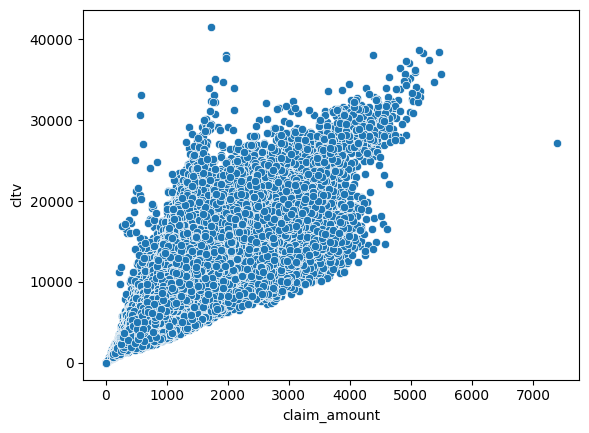

In [14]:
sns.scatterplot(data=df, x="claim_amount", y="cltv")

<Axes: xlabel='claim_amount', ylabel='cltv'>

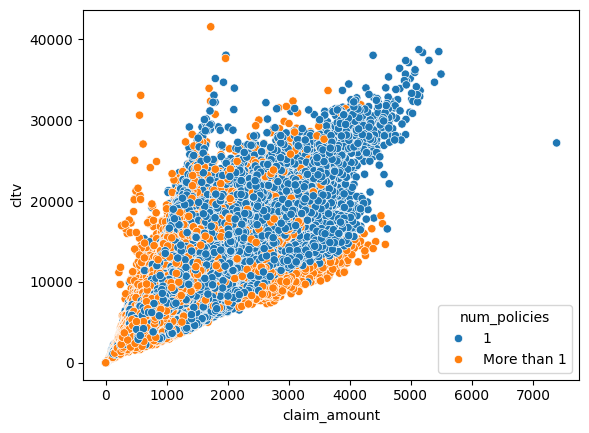

In [15]:
sns.scatterplot(data=df, x="claim_amount", y="cltv", hue="num_policies")

#<h3> Insight 1 -
illustrates that the average CLTV is significantly higher in urban areas compared to rural areas, indicating that customers' geographic location may be a strong predictor of their lifetime value to a business.

<ipython-input-16-4d8acd87c2d5>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Area', y='cltv', data=df, ci=None)


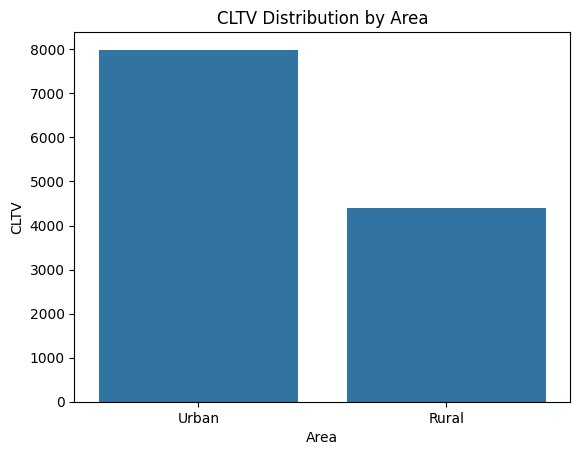

In [16]:
sns.barplot(x='Area', y='cltv', data=df, ci=None)

plt.xlabel('Area')
plt.ylabel('CLTV')
plt.title('CLTV Distribution by Area')
plt.show()

# Insight 2
Bar chart below indicates that individuals categorized under 'Others' in qualification have the highest average CLTV. This suggests that the 'Others' group contains key segments that are particularly valuable to the business.


<ipython-input-17-392a427abb89>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='qualification', y='cltv', data=df, ci=None)


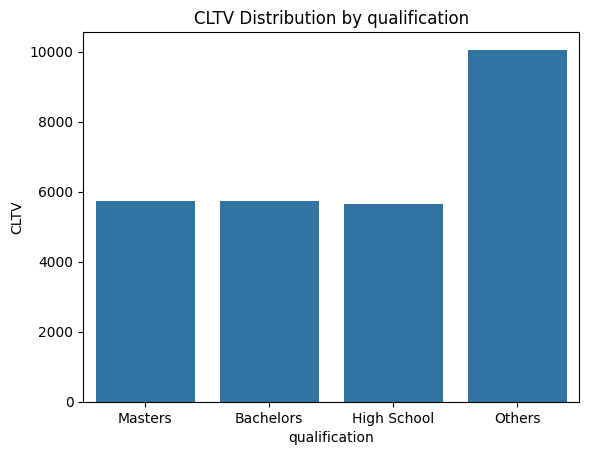

In [17]:
sns.barplot(x='qualification', y='cltv', data=df, ci=None)

plt.xlabel('qualification')
plt.ylabel('CLTV')
plt.title('CLTV Distribution by qualification')
plt.show()

# Insight 3
reveals that policy type 'b' is associated with the highest average CLTV, suggesting that this policy type may be more lucrative or appealing to customers, thus potentially a strategic focus for the business.

<ipython-input-18-e62cf06a69aa>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='policy', y='cltv', data=df, ci=None)


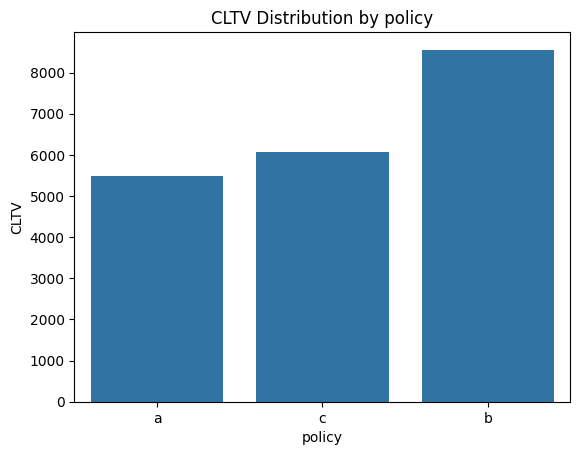

In [18]:
sns.barplot(x='policy', y='cltv', data=df, ci=None)

plt.xlabel('policy')
plt.ylabel('CLTV')
plt.title('CLTV Distribution by policy')

plt.show()

<h3> Insight 4

<ipython-input-19-e3aaa33fc4dd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='num_policies', y='cltv', data=df, ci=None)


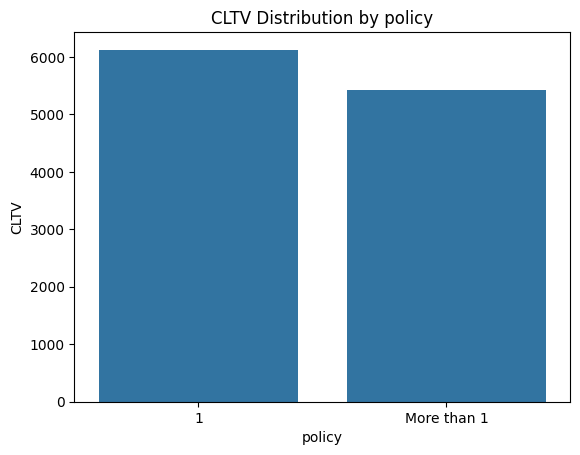

In [19]:
sns.barplot(x='num_policies', y='cltv', data=df, ci=None)

plt.xlabel('policy')
plt.ylabel('CLTV')
plt.title('CLTV Distribution by policy')
plt.show()

# Insight 5-
suggests that the Silver policy holders have a marginally higher average CLTV compared to Gold policy holders, which could imply that Silver policies strike a better balance between benefits and costs, attracting or retaining more profitable customers.

<ipython-input-20-7fe601f19cc5>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type_of_policy', y='cltv', data=df, ci=None)


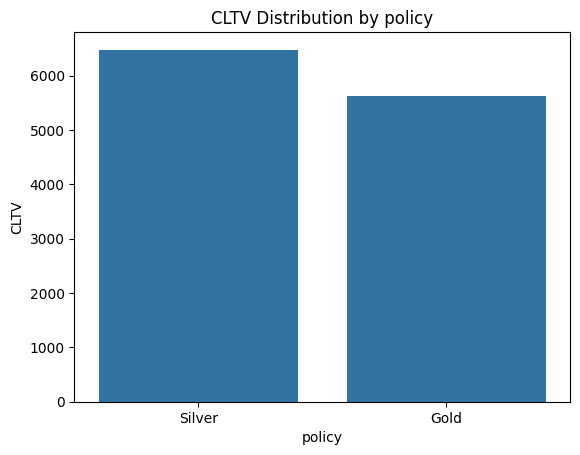

In [20]:
sns.barplot(x='type_of_policy', y='cltv', data=df, ci=None)

plt.xlabel('policy')
plt.ylabel('CLTV')
plt.title('CLTV Distribution by policy')

plt.show()

<h1> DATA PREPROCESSING

<h2> Handling Ordinal Data

In [21]:
df['qualification'].value_counts()

qualification
Bachelors      551627
High School    312912
Masters        136840
Others          15830
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

# Define the order of ordinal values
ordinal_mapping = {'Others': 4, 'Masters': 3, 'Bachelors': 2, 'High School': 1}

# Apply LabelEncoder with the defined mapping
label_encoder = LabelEncoder()
label_encoder.fit([qualification for qualification in ordinal_mapping.keys()])
df['qualification'] = df['qualification'].map(ordinal_mapping)

In [23]:
df['income'].value_counts()

income
0-5L             406974
5-10L            373855
More than 10L    236380
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

# Define the order of ordinal values
ordinal_mapping = { 'More than 10L': 3, '5-10L': 2, '0-5L': 1}

# Apply LabelEncoder with the defined mapping
label_encoder = LabelEncoder()
label_encoder.fit([income for income in ordinal_mapping.keys()])
df['income'] = df['income'].map(ordinal_mapping)

In [25]:
df.head()

,claim_amount,vintage,Gender,Area,marital_status,type_of_policy,income,qualification,policy,num_policies,cltv
0,555,5,Male,Urban,0,Silver,3,3,a,1,5263
1,625,5,Male,Urban,0,Silver,3,2,a,More than 1,6064
2,821,5,Male,Urban,0,Silver,3,2,a,More than 1,8314
3,1498,5,Male,Urban,0,Silver,3,3,c,1,13995
4,559,5,Male,Urban,0,Silver,3,2,a,1,4822


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   claim_amount    1017209 non-null  int64 
 1   vintage         1017209 non-null  object
 2   Gender          1017209 non-null  object
 3   Area            1017209 non-null  object
 4   marital_status  1017209 non-null  object
 5   type_of_policy  1017209 non-null  object
 6   income          1017209 non-null  int64 
 7   qualification   1017209 non-null  int64 
 8   policy          1017209 non-null  object
 9   num_policies    1017209 non-null  object
 10  cltv            1017209 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 85.4+ MB


In [27]:
#Identify categorical and numerical variables
categoricals = df.columns[df.dtypes == 'object']
numeric = df.columns[df.dtypes != 'object']

In [28]:
categoricals

Index(['vintage', 'Gender', 'Area', 'marital_status', 'type_of_policy',
       'policy', 'num_policies'],
      dtype='object')

In [29]:
numeric

Index(['claim_amount', 'income', 'qualification', 'cltv'], dtype='object')

#Handling categorical Data

In [30]:
#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
train = pd.get_dummies(df, drop_first=True)
train = train.astype(int)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype
---  ------                    --------------    -----
 0   claim_amount              1017209 non-null  int64
 1   income                    1017209 non-null  int64
 2   qualification             1017209 non-null  int64
 3   cltv                      1017209 non-null  int64
 4   vintage_1                 1017209 non-null  int64
 5   vintage_2                 1017209 non-null  int64
 6   vintage_3                 1017209 non-null  int64
 7   vintage_4                 1017209 non-null  int64
 8   vintage_5                 1017209 non-null  int64
 9   vintage_6                 1017209 non-null  int64
 10  Gender_Male               1017209 non-null  int64
 11  Area_Urban                1017209 non-null  int64
 12  marital_status_1          1017209 non-null  int64
 13  type_of_policy_Silver     1017209 non-null  int64
 14  po

In [31]:
train.head()

,claim_amount,income,qualification,cltv,vintage_1,vintage_2,vintage_3,vintage_4,vintage_5,vintage_6,Gender_Male,Area_Urban,marital_status_1,type_of_policy_Silver,policy_b,policy_c,num_policies_More than 1
0,555,3,3,5263,0,0,0,0,1,0,1,1,0,1,0,0,0
1,625,3,2,6064,0,0,0,0,1,0,1,1,0,1,0,0,1
2,821,3,2,8314,0,0,0,0,1,0,1,1,0,1,0,0,1
3,1498,3,3,13995,0,0,0,0,1,0,1,1,0,1,0,1,0
4,559,3,2,4822,0,0,0,0,1,0,1,1,0,1,0,0,0


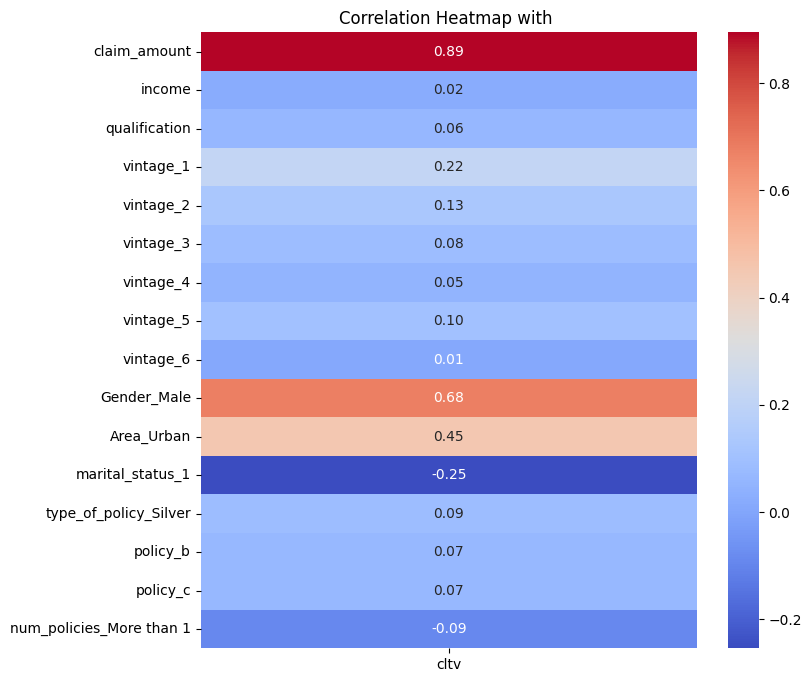

In [32]:
correlations = train.corr()[['cltv']]

# Drop the correlation with itself (which will be 1)
correlations = correlations.drop('cltv')

plt.figure(figsize=(8, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Correlation Heatmap with ')
plt.show()

In [33]:
#dropping income as it has very less correlation with ctv, hence it dosnet impact cltv
train = train.drop('income' , axis=1)

In [34]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example DataFrame
# Let's assume df is your DataFrame with 14 columns

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# Calculate VIF for df
vif_df = calculate_vif(train)

print(vif_df)


                    Variable         VIF
0               claim_amount   24.458170
1              qualification    5.236900
2                       cltv   30.472399
3                  vintage_1   23.942559
4                  vintage_2   24.138802
5                  vintage_3   24.139697
6                  vintage_4   24.201029
7                  vintage_5   24.140457
8                  vintage_6   23.740708
9                Gender_Male  141.041185
10                Area_Urban    2.632988
11          marital_status_1    5.608030
12     type_of_policy_Silver    1.338565
13                  policy_b    1.376307
14                  policy_c    1.801665
15  num_policies_More than 1    1.976445


Drop Gender_Male as it has high VIF value

In [35]:
train = train.drop('Gender_Male' , axis=1)

#Splitting data

In [36]:
X = train.loc[:, train.columns != 'cltv']
y = train['cltv']


#Applying Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['claim_amount']
scaler = MinMaxScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

print(X)

         claim_amount  qualification  vintage_1  vintage_2  vintage_3  \
0            0.075122              3          0          0          0   
1            0.084597              2          0          0          0   
2            0.111126              2          0          0          0   
3            0.202761              3          0          0          0   
4            0.075663              2          0          0          0   
...               ...            ...        ...        ...        ...   
1017204      0.000000              2          0          1          0   
1017205      0.000000              3          0          1          0   
1017206      0.000000              2          0          1          0   
1017207      0.000000              2          0          1          0   
1017208      0.000000              1          0          1          0   

         vintage_4  vintage_5  vintage_6  Area_Urban  marital_status_1  \
0                0          1          0         

<ipython-input-37-67bbdd843bc2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])


#Splitting into training and test Dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(813767, 14)
(203442, 14)
(813767,)
(203442,)


In [40]:
X.head()

,claim_amount,qualification,vintage_1,vintage_2,vintage_3,vintage_4,vintage_5,vintage_6,Area_Urban,marital_status_1,type_of_policy_Silver,policy_b,policy_c,num_policies_More than 1
0,0.075122,3,0,0,0,0,1,0,1,0,1,0,0,0
1,0.084597,2,0,0,0,0,1,0,1,0,1,0,0,1
2,0.111126,2,0,0,0,0,1,0,1,0,1,0,0,1
3,0.202761,3,0,0,0,0,1,0,1,0,1,0,1,0
4,0.075663,2,0,0,0,0,1,0,1,0,1,0,0,0


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,roc_auc_score


<h1> Running Different ML Models to see which one gives best accuracy

Linear Regression

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_train_pred = linear_regressor.predict(X_train)
y_test_pred = linear_regressor.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (Training Set):", train_mae)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training Set):", train_mse)

test_mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (Test Set):", test_mae)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test Set):", test_mse)

train_r2 = r2_score(y_train, y_train_pred)
print("R-squared (Training Set):", train_r2)

test_r2 = r2_score(y_test, y_test_pred)
print("R-squared (Test Set):", test_r2)


Mean Absolute Error (Training Set): 890.7318197234626
Mean Squared Error (Training Set): 1542456.3891574163
Mean Absolute Error (Test Set): 886.5368832928579
Mean Squared Error (Test Set): 1531069.7145147137
R-squared (Training Set): 0.8960132758219795
R-squared (Test Set): 0.8963864772438741


Lasso Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)

y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (Training Set):", train_mae)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training Set):", train_mse)

test_mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (Test Set):", test_mae)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test Set):", test_mse)

train_r2 = r2_score(y_train, y_train_pred)
print("R-squared (Training Set):", train_r2)

test_r2 = r2_score(y_test, y_test_pred)
print("R-squared (Test Set):", test_r2)


Mean Absolute Error (Training Set): 921.384442073927
Mean Squared Error (Training Set): 1666472.4600782471
Mean Absolute Error (Test Set): 917.0717631166331
Mean Squared Error (Test Set): 1650030.9393667139
R-squared (Training Set): 0.8876525694505463
R-squared (Test Set): 0.888335902236448


Decision Tree

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (Training Set):", train_mae)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training Set):", train_mse)

test_mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (Test Set):", test_mae)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test Set):", test_mse)

train_r2 = r2_score(y_train, y_train_pred)
print("R-squared (Training Set):", train_r2)

test_r2 = r2_score(y_test, y_test_pred)
print("R-squared (Test Set):", test_r2)


Mean Absolute Error (Training Set): 520.3470006280163
Mean Squared Error (Training Set): 667906.9038641038
Mean Absolute Error (Test Set): 812.8180006956433
Mean Squared Error (Test Set): 1569957.385641688
R-squared (Training Set): 0.9549721784830156
R-squared (Test Set): 0.8937547952511802


Random Forest

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(n_estimators=200)
random_forest_regressor.fit(X_train, y_train)

y_train_pred = random_forest_regressor.predict(X_train)
y_test_pred = random_forest_regressor.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (Training Set):", train_mae)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training Set):", train_mse)

test_mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (Test Set):", test_mae)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test Set):", test_mse)

train_r2 = r2_score(y_train, y_train_pred)
print("R-squared (Training Set):", train_r2)

test_r2 = r2_score(y_test, y_test_pred)
print("R-squared (Test Set):", test_r2)


Mean Absolute Error (Training Set): 565.4567265775903
Mean Squared Error (Training Set): 707366.6988171967
Mean Absolute Error (Test Set): 764.6607747792101
Mean Squared Error (Test Set): 1328284.6500734095
R-squared (Training Set): 0.9523119445582497
R-squared (Test Set): 0.9101097418933557


Ridge Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (Training Set):", train_mae)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training Set):", train_mse)

test_mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (Test Set):", test_mae)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test Set):", test_mse)

train_r2 = r2_score(y_train, y_train_pred)
print("R-squared (Training Set):", train_r2)

test_r2 = r2_score(y_test, y_test_pred)
print("R-squared (Test Set):", test_r2)


Mean Absolute Error (Training Set): 919.6680526456751
Mean Squared Error (Training Set): 1665873.7693098783
Mean Absolute Error (Test Set): 915.2946288847646
Mean Squared Error (Test Set): 1649047.1952099262
R-squared (Training Set): 0.8876929309753426
R-squared (Test Set): 0.8884024760812632


KNN

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (Training Set):", train_mae)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training Set):", train_mse)

test_mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (Test Set):", test_mae)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test Set):", test_mse)

train_r2 = r2_score(y_train, y_train_pred)
print("R-squared (Training Set):", train_r2)

test_r2 = r2_score(y_test, y_test_pred)
print("R-squared (Test Set):", test_r2)


Mean Absolute Error (Training Set): 654.7738229738978
Mean Squared Error (Training Set): 949332.018004564
Mean Absolute Error (Test Set): 764.0026572684106
Mean Squared Error (Test Set): 1312283.0690191803
R-squared (Training Set): 0.9359995346360943
R-squared (Test Set): 0.9111926319583726


Neural Network

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, ), activation='relu', solver='adam', alpha=0.05,
                             batch_size='auto', learning_rate='constant', learning_rate_init=0.05,
                             max_iter=20, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                             warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                             validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
                             n_iter_no_change=10, max_fun=15000)

mlp_regressor.fit(X_train, y_train)

y_train_pred = mlp_regressor.predict(X_train)
y_test_pred = mlp_regressor.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (Training Set):", train_mae)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training Set):", train_mse)

test_mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (Test Set):", test_mae)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test Set):", test_mse)

train_r2 = r2_score(y_train, y_train_pred)
print("R-squared (Training Set):", train_r2)

test_r2 = r2_score(y_test, y_test_pred)
print("R-squared (Test Set):", test_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error (Training Set): 833.680637400518
Mean Squared Error (Training Set): 1427464.1882182541
Mean Absolute Error (Test Set): 830.9844152357612
Mean Squared Error (Test Set): 1416333.9088823337
R-squared (Training Set): 0.9037656261417291
R-squared (Test Set): 0.9041511014769392


Gradient Boosting

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = gb_regressor.predict(X_train)

# Make predictions on the test set
y_test_pred = gb_regressor.predict(X_test)

# Evaluate the model on the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (Training Set):", train_mae)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training Set):", train_mse)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (Test Set):", test_mae)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test Set):", test_mse)

# Calculate R-squared on the training set
train_r2 = r2_score(y_train, y_train_pred)
print("R-squared (Training Set):", train_r2)

# Calculate R-squared on the test set
test_r2 = r2_score(y_test, y_test_pred)
print("R-squared (Test Set):", test_r2)


Mean Absolute Error (Training Set): 742.0448529648878
Mean Squared Error (Training Set): 1164054.795739781
Mean Absolute Error (Test Set): 742.0633840306418
Mean Squared Error (Test Set): 1169339.248882545
R-squared (Training Set): 0.9215237164411387
R-squared (Test Set): 0.9208662037233718


<h1> Improving Accuracy of Gradient Boosting Algorithm

Feature Importance

In [ ]:
gb_regressor.fit(X_train, y_train)
feature_importance = gb_regressor.feature_importances_

# Print feature importance
for i, val in enumerate(feature_importance):
    print(f"Feature {i}, Importance: {val}")


Feature 0, Importance: 0.49987018005815703
Feature 1, Importance: 0.2775098191478329
Feature 2, Importance: 0.06395695987137814
Feature 3, Importance: 0.034903661917565484
Feature 4, Importance: 0.09950401768760152
Feature 5, Importance: 0.0005327237816899398
Feature 6, Importance: 0.009041956579155967
Feature 7, Importance: 0.00886050704874353
Feature 8, Importance: 0.0058201739078755374


#Hyperparameter tuning

We tried different values for hyperparameter such as -

n_estimators= 50, 100, 150

learning_rate= 0.05, 0.1, 0.2,

max_depth= 3, 5, 7

min_samples_leaf = 50, 100, 150

min_samples_split= 10, 20, 30

In [44]:


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Define the minimum number of samples required to split an internal node
min_samples_split = 20


# Instantiate the GradientBoostingRegressor with specified parameters
gb_regressor = GradientBoostingRegressor(n_estimators=150,
                                          learning_rate=0.2,
                                          max_depth=5,
                                          random_state=42,
                                          min_samples_split=min_samples_split,
                                          min_samples_leaf = 100 ,
                                         validation_fraction=0.1,
                                         n_iter_no_change=10,  # stop if 10 iterations without improvement
                                         tol=0.001,    # tolerance for the stopping
                                         subsample=0.8)  # Use 80% of data for each tree training


# Fit the model
gb_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = gb_regressor.predict(X_train)
y_test_pred = gb_regressor.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (Training Set):", train_mae)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training Set):", train_mse)

test_mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (Test Set):", test_mae)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test Set):", test_mse)

train_r2 = r2_score(y_train, y_train_pred)
print("R-squared (Training Set):", train_r2)

test_r2 = r2_score(y_test, y_test_pred)
print("R-squared (Test Set):", test_r2)

Mean Absolute Error (Training Set): 711.1031039466078
Mean Squared Error (Training Set): 1101572.1524007854
Mean Absolute Error (Test Set): 712.9360838066178
Mean Squared Error (Test Set): 1112834.2404089589
R-squared (Training Set): 0.9257360659405985
R-squared (Test Set): 0.924690120378381


#K-Fold cross Validation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
import numpy as np

# Define the minimum number of samples required to split an internal node
min_samples_split = 20

# Instantiate the GradientBoostingRegressor with specified parameters
gb_regressor = GradientBoostingRegressor(n_estimators=150,
                                         learning_rate=0.2,
                                         max_depth=5,
                                         random_state=42,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=100,
                                         validation_fraction=0.1,
                                         n_iter_no_change=10,  # Stop if 10 iterations without improvement
                                         tol=0.001,            # Tolerance for the stopping
                                         subsample=0.8)        # Use 80% of data for each tree training

# Define k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store metrics for each fold
r2_scores = []
mse_scores = []
mae_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_k, y_test_k = y_train.iloc[train_index], y_train.iloc[test_index]

    gb_regressor.fit(X_train_k, y_train_k)

    y_pred_k = gb_regressor.predict(X_test_k)

    r2 = r2_score(y_test_k, y_pred_k)
    mse = mean_squared_error(y_test_k, y_pred_k)
    mae = mean_absolute_error(y_test_k, y_pred_k)

    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Print the accuracy for each fold
for i in range(k):
    print(f"R-squared (Fold {i+1}): {r2_scores[i]}")
    print(f"Mean Squared Error (Fold {i+1}): {mse_scores[i]}")
    print(f"Mean Absolute Error (Fold {i+1}): {mae_scores[i]}")

# Calculate and print the average accuracy
print("Average R-squared:", np.mean(r2_scores))
print("Average Mean Squared Error:", np.mean(mse_scores))
print("Average Mean Absolute Error:", np.mean(mae_scores))



R-squared (Fold 1): 0.9258689619988567
Mean Squared Error (Fold 1): 1108345.4983760698
Mean Absolute Error (Fold 1): 710.9281650731589
R-squared (Fold 2): 0.9255904335610247
Mean Squared Error (Fold 2): 1104791.9423552891
Mean Absolute Error (Fold 2): 711.7825674654908
R-squared (Fold 3): 0.9251811447746467
Mean Squared Error (Fold 3): 1111072.2967781734
Mean Absolute Error (Fold 3): 711.9421362098126
R-squared (Fold 4): 0.9248253901188056
Mean Squared Error (Fold 4): 1104644.7744096406
Mean Absolute Error (Fold 4): 707.5738083636938
R-squared (Fold 5): 0.9255023235724381
Mean Squared Error (Fold 5): 1104245.8320738727
Mean Absolute Error (Fold 5): 709.2202078547181
Average R-squared: 0.9253936508051543
Average Mean Squared Error: 1106620.068798609
Average Mean Absolute Error: 710.2893769933748


Visualizaing Accuracy


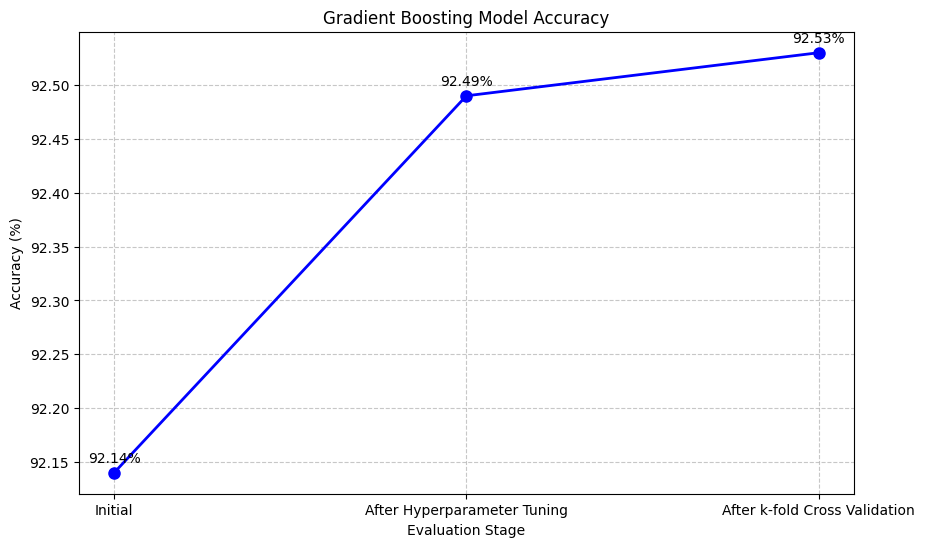

In [ ]:
import matplotlib.pyplot as plt

# Data
methods = ['Initial', 'After Hyperparameter Tuning', 'After k-fold Cross Validation']
accuracies = [92.14, 92.49, 92.53]

# Plotting the line chart
plt.figure(figsize=(10, 6))
line, = plt.plot(methods, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Adding the percentage on top of each point
for i, acc in enumerate(accuracies):
    plt.text(methods[i], acc + 0.01, f"{acc}%", ha='center', color='black')

# Title and labels
plt.title('Gradient Boosting Model Accuracy')
plt.xlabel('Evaluation Stage')
plt.ylabel('Accuracy (%)')

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()
